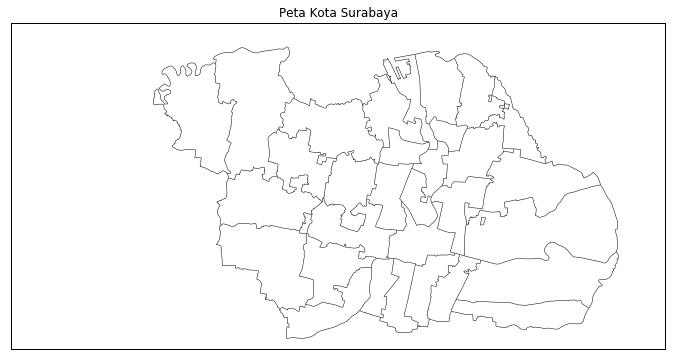

In [42]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from mpl_toolkits.basemap import Basemap
%matplotlib inline

plt.figure(1, figsize=(12,6))

lon_min, lon_max = 112.51338, 112.872205
lat_min, lat_max = -7.357448, -7.178877

map = Basemap(projection='tmerc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_0=-7.1,
             lon_0=112.6,
             resolution='h')
             

map.fillcontinents(color='#FFFFFF',lake_color='#FFFFFF') # dark grey land, black lakes
map.drawmapboundary(fill_color='#FFFFFF')                # black background
map.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

map.readshapefile('C:/Users/dwi budi/Garis_Batas_Kecamatan','Garis_Batas_Kecamatan')

# lons = [ 112.7131642,112.7118639]
# lats = [ -7.251821,-7.3087752]
# labels = ['SMKS TARUNA SURABAYA','SMKS KARTIKA 1 SURABAYA']

# x_offsets = [10000, -30000, -25000]
# y_offsets = [5000, -25000, -25000]

# x,y = map(lons, lats)
# map.plot(x, y, 'bo', markersize=10)

# plt.title("Pemetaan Kota di Pulau Jawa")

# for label, x, y in zip(labels, x, y):
#     plt.text(x-1000, y+200, label)
    
    

plt.title("Peta Kota Surabaya")
plt.show()

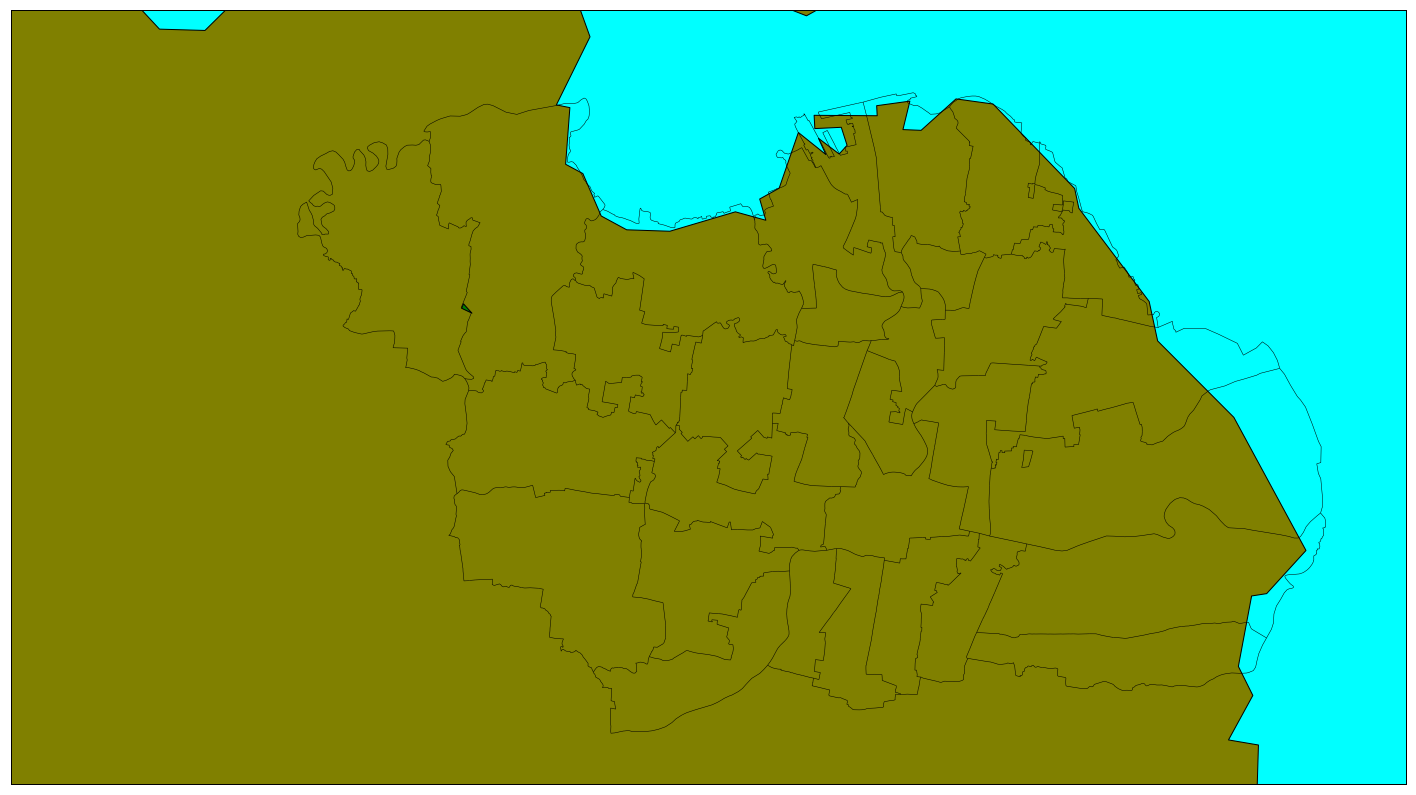

In [27]:
import matplotlib.pyplot as plt
from numpy import array
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch

fig = plt.figure(1, figsize=(25,35))
#fig = plt.figure()
ax = fig.add_subplot(111)

lon_min, lon_max = 112.51338, 112.872205
lat_min, lat_max = -7.357448, -7.178877

map = Basemap(llcrnrlat=lat_min,
              urcrnrlat=lat_max,
              llcrnrlon=lon_min,
              urcrnrlon=lon_max,
              resolution='h',
              projection='tmerc',
              lat_0 = -7.1,
              lon_0 = 112.6,
              epsg=2389)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='#808000',lake_color='aqua')
map.drawcoastlines()

map.readshapefile('Garis_Batas_Kecamatan', 'Garis_Batas_Kecamatan')

#for info, shape in zip(map.comarques_info, map.comarques):
#    if info['way'] == 'Benowo':
#        x, y = zip(*shape) 
#        map.plot(x, y, marker=None,color='m'))



pg = []

for info, shape in zip(map.Garis_Batas_Kecamatan, map.Garis_Batas_Kecamatan):
    pg.append(Polygon(array(shape), True))
    #print(info['name'])
    break
ax.add_collection(PatchCollection(pg, facecolor='green', edgecolor='k', linewidths=1, zorder=2))


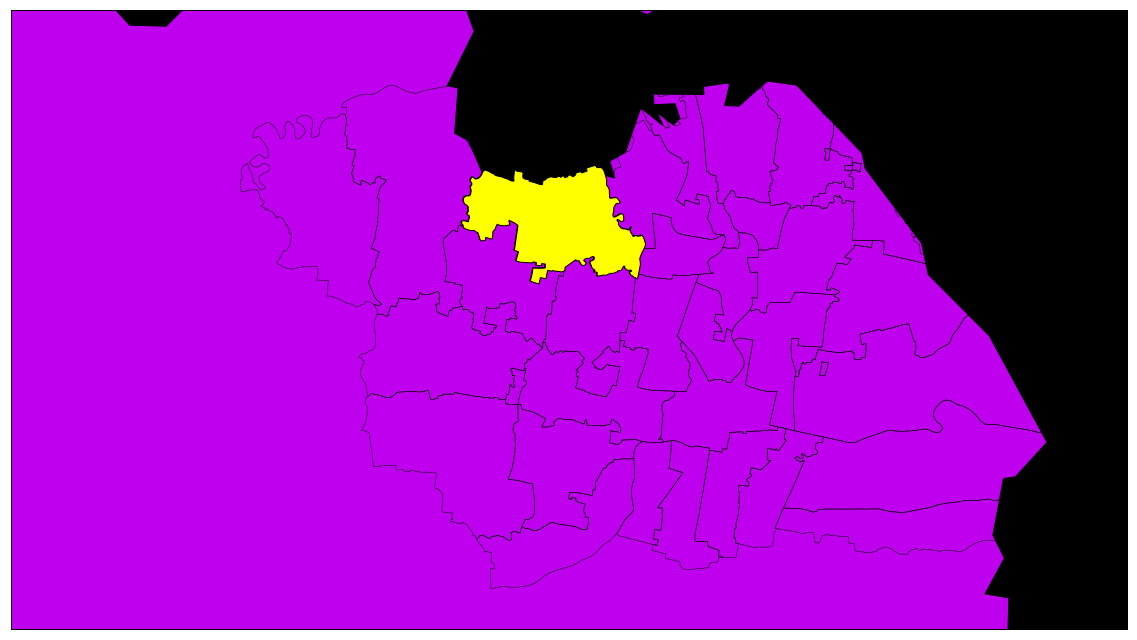

In [86]:
import matplotlib.pyplot as plt 
from numpy import array 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
import pandas as pd


fig = plt.figure(1, figsize=(20,30))
#fig = plt.figure()
ax = fig.add_subplot(111)

lon_min, lon_max = 112.51338, 112.872205
lat_min, lat_max = -7.357448, -7.178877

map = Basemap(llcrnrlat=lat_min,
              urcrnrlat=lat_max,
              llcrnrlon=lon_min,
              urcrnrlon=lon_max,
              resolution='h',
              projection='tmerc',
              lat_0 = -7.1,
              lon_0 = 112.6,
              epsg=2389)

map.drawmapboundary(fill_color='black')
map.fillcontinents(color='#BF00EF',lake_color='black')
map.drawcoastlines()

map.readshapefile('Kec_Surabaya_2017', 'Kec_Surabaya_2017')

pg = []
kec = []

#(use "r" before the path string to address special character, such as '\'). Don't forget to put the file name at the end of the path + '.xlsx'
df = pd.read_excel (r'C:\Users\dwi budi\data_sekolah_smk.xlsx', usecols=['Wilayah', 'Total'])

for info, shape in zip(map.Kec_Surabaya_2017_info, map.Kec_Surabaya_2017):
    if (info['name'] == 'Asemrowo'):
        if(df['Total'][0] == 0):
            pg.append(Polygon(array(shape), True))
            ax.add_collection(PatchCollection(pg, facecolor='red', edgecolor='k', linewidths=1, zorder=2))
        elif((df['Total'][0] > 0) and (df['Total'][0] <= 5)):
            pg.append(Polygon(array(shape), True))
            ax.add_collection(PatchCollection(pg, facecolor='yellow', edgecolor='k', linewidths=1, zorder=2))
        elif((df['Total'][0] > 5) and (df['Total'][0] <= 10)):
            pg.append(Polygon(array(shape), True))
            ax.add_collection(PatchCollection(pg, facecolor='Green', edgecolor='k', linewidths=1, zorder=2))
        else:
            pg.append(Polygon(array(shape), True))
            ax.add_collection(PatchCollection(pg, facecolor='Blue', edgecolor='k', linewidths=1, zorder=2))

 
#ax.add_collection(PatchCollection(pg, facecolor='green', edgecolor='k', linewidths=1, zorder=2))
plt.show()
